## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [3]:
f = '../out.hdf5'
event_vars, m = h5load(f,'vars')

In [4]:
event_vars

,ntracks_track_down,ngood_fastjets_track_down,SUEP_genMass_track_down,SUEP_genPt_track_down,SUEP_nconst_CL_track_down,SUEP_pt_avg_b_CL_track_down,SUEP_S1_CL_track_down,SUEP_pt_avg_CL_track_down,SUEP_pt_CL_track_down,SUEP_eta_CL_track_down,...,SUEP_delta_mass_genMass_CL,SUEP_delta_pt_genPt_CL,ISR_nconst_CL,ISR_pt_avg_b_CL,ISR_S1_CL,ISR_pt_avg_CL,ISR_pt_CL,ISR_eta_CL,ISR_phi_CL,ISR_mass_CL
0,105,2,125.0,424.0,83.0,1.306494,0.510804,4.715361,378.402916,1.383311,...,33.142592,-43.107987,17.0,3.359703,0.133776,18.368773,305.953097,-1.363985,-2.317760,79.682451
1,152,3,125.0,804.0,88.0,0.853394,0.860418,4.654535,405.422396,0.192469,...,-30.855118,-398.577604,37.0,5.107768,0.222021,14.771062,517.434802,0.276068,-2.752703,231.574509
2,162,1,125.0,472.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,183,2,125.0,1036.0,140.0,0.689604,0.927803,6.645322,925.875406,-0.340717,...,5.787555,-90.508445,23.0,4.772380,0.091499,20.166483,461.828913,-0.559936,-1.987603,113.769226
4,181,2,125.0,634.0,142.0,0.629919,0.775671,3.921174,550.471126,-0.583231,...,-6.701305,-78.447402,19.0,1.720914,0.565477,8.900580,166.041451,-1.458392,-2.364671,43.273229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,112,1,125.0,534.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,167,3,125.0,364.0,105.0,1.025097,0.787714,3.539560,358.125773,0.637259,...,4.139242,1.935707,23.0,1.687848,0.497527,14.955825,339.392707,-2.024883,-2.095348,67.171841
341,133,2,125.0,590.0,92.0,0.735238,0.866672,4.061328,367.699125,1.428295,...,-30.966674,-215.090374,26.0,4.323218,0.152126,12.421387,309.940754,-0.706165,-0.143720,117.601473
342,171,2,125.0,471.0,135.0,1.121807,0.787955,3.938465,508.999741,-1.158913,...,106.575029,51.041188,28.0,1.510682,0.263407,9.064036,252.437216,-1.217838,-0.949511,49.219481


In [6]:
for key in event_vars:
    if "gen" not in key: continue
    print(key)

SUEP_genMass_track_down
SUEP_genPt_track_down
SUEP_delta_mass_genMass_CL_track_down
SUEP_delta_pt_genPt_CL_track_down
SUEP_genMass
SUEP_genPt
SUEP_delta_mass_genMass_CL
SUEP_delta_pt_genPt_CL


In [7]:
event_vars['SUEP_genPt']

0       424.0
1       804.0
2       472.0
3      1036.0
4       634.0
        ...  
339     534.0
340     364.0
341     590.0
342     471.0
343     558.0
Name: SUEP_genPt, Length: 344, dtype: float64

In [120]:
gen_pt = event_vars['SUEP_genPt']

(array([  6.,  19.,  55., 154.,  66.,  21.,  16.,   4.,   1.,   2.]),
 array([  78.5 ,  220.65,  362.8 ,  504.95,  647.1 ,  789.25,  931.4 ,
        1073.55, 1215.7 , 1357.85, 1500.  ]),
 <BarContainer object of 10 artists>)

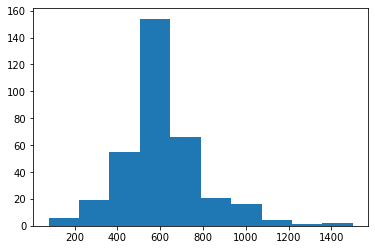

In [121]:
plt.hist(gen_pt)

In [119]:
Higgs_bins = np.array([   0,  400,  450,  500,  550,  600,  650,  700,  750,  800,  850,
        900,  950, 1000, 1050, 1100, 1150, 1200, 1250, 1500])
Higgs_factor = np.array([1.25, 1.25, 1.25, 1.25, 1.25, 1.24, 1.24, 1.24, 1.24, 1.24, 1.24,
       1.24, 1.24, 1.24, 1.24, 1.24, 1.24, 1.24, 1.24])
up_factor   = np.array([1.092, 1.092, 1.089, 1.088, 1.088, 1.087, 1.087, 1.087, 1.087,
       1.087, 1.085, 1.086, 1.086, 1.086, 1.087, 1.087, 1.087, 1.086,
       1.086])
down_factor = np.array([0.88, 0.88, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89,
       0.89, 0.89, 0.89, 0.89, 0.89, 0.88, 0.88, 0.88])
binc = np.array([ 0.5*(Higgs_bins[i]+Higgs_bins[i+1])for i in range(Higgs_bins.shape[0]-1)])

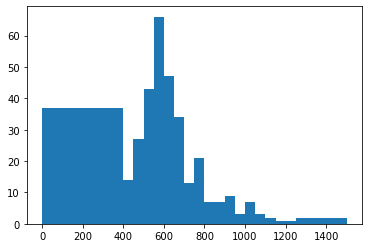

In [122]:
vals = plt.hist(gen_pt, bins=Higgs_bins)

In [144]:
freqs = vals[0]* Higgs_factor
ups   = freqs * up_factor
downs = freqs * down_factor

In [145]:
vals[0]

array([37., 14., 27., 43., 66., 47., 34., 13., 21.,  7.,  7.,  9.,  3.,
        7.,  3.,  2.,  1.,  1.,  2.])

In [146]:
freqs

array([46.25, 17.5 , 33.75, 53.75, 82.5 , 58.28, 42.16, 16.12, 26.04,
        8.68,  8.68, 11.16,  3.72,  8.68,  3.72,  2.48,  1.24,  1.24,
        2.48])

(array([40.7   , 15.4   , 30.0375, 47.8375, 73.425 , 51.8692, 37.5224,
        14.3468, 23.1756,  7.7252,  7.7252,  9.9324,  3.3108,  7.7252,
         3.3108,  2.2072,  1.0912,  1.0912,  2.1824]),
 array([   0,  400,  450,  500,  550,  600,  650,  700,  750,  800,  850,
         900,  950, 1000, 1050, 1100, 1150, 1200, 1250, 1500]),
 <BarContainer object of 19 artists>)

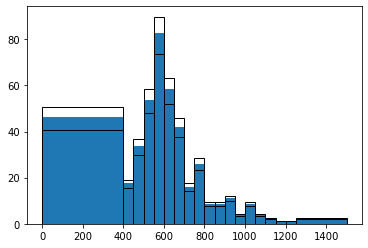

In [147]:
plt.hist(binc, bins=vals[1], weights=freqs)
plt.hist(binc, bins=vals[1], weights=ups, fill=False)
plt.hist(binc, bins=vals[1], weights=downs, fill=False)

In [148]:
start = vals[0].sum()
end = freqs.sum()
factor = start/end

In [149]:
factor

0.8029316341059215

In [150]:
freqs = freqs * factor
ups = ups * factor
downs = downs * factor

In [152]:
freqs

array([37.13558808, 14.0513036 , 27.09894265, 43.15757533, 66.24185981,
       46.79485564, 33.85159769, 12.94325794, 20.90833975,  6.96944658,
        6.96944658,  8.96071704,  2.98690568,  6.96944658,  2.98690568,
        1.99127045,  0.99563523,  0.99563523,  1.99127045])

(array([32.67931751, 12.36514717, 24.11805896, 38.41024205, 58.95525523,
        41.64742152, 30.12792195, 11.51949957, 18.60842238,  6.20280746,
         6.20280746,  7.97503816,  2.65834605,  6.20280746,  2.65834605,
         1.7722307 ,  0.876159  ,  0.876159  ,  1.752318  ]),
 array([   0,  400,  450,  500,  550,  600,  650,  700,  750,  800,  850,
         900,  950, 1000, 1050, 1100, 1150, 1200, 1250, 1500]),
 <BarContainer object of 19 artists>)

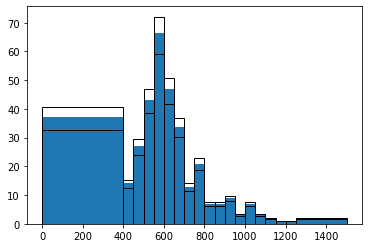

In [151]:
plt.hist(binc, bins=vals[1], weights=freqs)
plt.hist(binc, bins=vals[1], weights=ups, fill=False)
plt.hist(binc, bins=vals[1], weights=downs, fill=False)

In [153]:
weight = freqs / vals[0]
up_weights = ups / vals[0]
down_weights = downs / vals[0]

(array([0.8832248 , 0.8832248 , 0.89326144, 0.89326144, 0.89326144,
        0.88611535, 0.88611535, 0.88611535, 0.88611535, 0.88611535,
        0.88611535, 0.88611535, 0.88611535, 0.88611535, 0.88611535,
        0.88611535, 0.876159  , 0.876159  , 0.876159  ]),
 array([   0,  400,  450,  500,  550,  600,  650,  700,  750,  800,  850,
         900,  950, 1000, 1050, 1100, 1150, 1200, 1250, 1500]),
 <BarContainer object of 19 artists>)

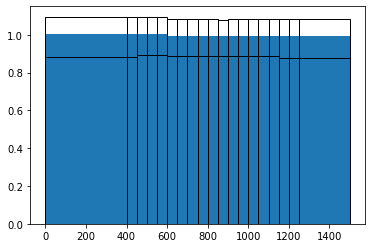

In [154]:
plt.hist(binc, bins=vals[1], weights=weight)
plt.hist(binc, bins=vals[1], weights=up_weights, fill=False)
plt.hist(binc, bins=vals[1], weights=down_weights, fill=False)

In [156]:
down_weights

array([0.8832248 , 0.8832248 , 0.89326144, 0.89326144, 0.89326144,
       0.88611535, 0.88611535, 0.88611535, 0.88611535, 0.88611535,
       0.88611535, 0.88611535, 0.88611535, 0.88611535, 0.88611535,
       0.88611535, 0.876159  , 0.876159  , 0.876159  ])